In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd




In [39]:
df_part1 = pd.read_csv('results_part1.csv')
df_part2 = pd.read_csv('results_part2.csv')
df_part3 = pd.read_csv('results_part3.csv')
df_part4 = pd.read_csv('results_part4.csv')
df_single = pd.read_csv('results_partSingle.csv')

# Concatenar todos em um único DataFrame
df_all = pd.concat([df_part1, df_part2, df_part3, df_part4, df_single], ignore_index=True)
df_all['Heuristic'] = df_all['Heuristic'].fillna('None')
df_all.head()

,Part,Algorithm,CostFunction,Heuristic,InitialState,Path,PathLength,Cost,NodesGenerated,NodesVisited
0,Parte1,A1,C1,None,"[6, 8, 7, 3, 0, 4, 5, 1, 2]","[6, 8, 7, 3, 0, 4, 5, 1, 2]|[6, 8, 7, 3, 4, 0,...",24,46,137548,115949
1,Parte1,A1,C2,None,"[6, 8, 7, 3, 0, 4, 5, 1, 2]","[6, 8, 7, 3, 0, 4, 5, 1, 2]|[6, 8, 7, 3, 4, 0,...",24,55,137548,115949
2,Parte1,A1,C3,None,"[6, 8, 7, 3, 0, 4, 5, 1, 2]","[6, 8, 7, 3, 0, 4, 5, 1, 2]|[6, 8, 7, 3, 4, 0,...",24,60,137548,115949
3,Parte1,A1,C4,None,"[6, 8, 7, 3, 0, 4, 5, 1, 2]","[6, 8, 7, 3, 0, 4, 5, 1, 2]|[6, 8, 7, 3, 4, 0,...",24,67,137548,115949
4,Parte1,A2,C1,None,"[6, 8, 7, 3, 0, 4, 5, 1, 2]","[6, 8, 7, 3, 0, 4, 5, 1, 2]|[6, 0, 7, 3, 8, 4,...",100,198,10180,10104


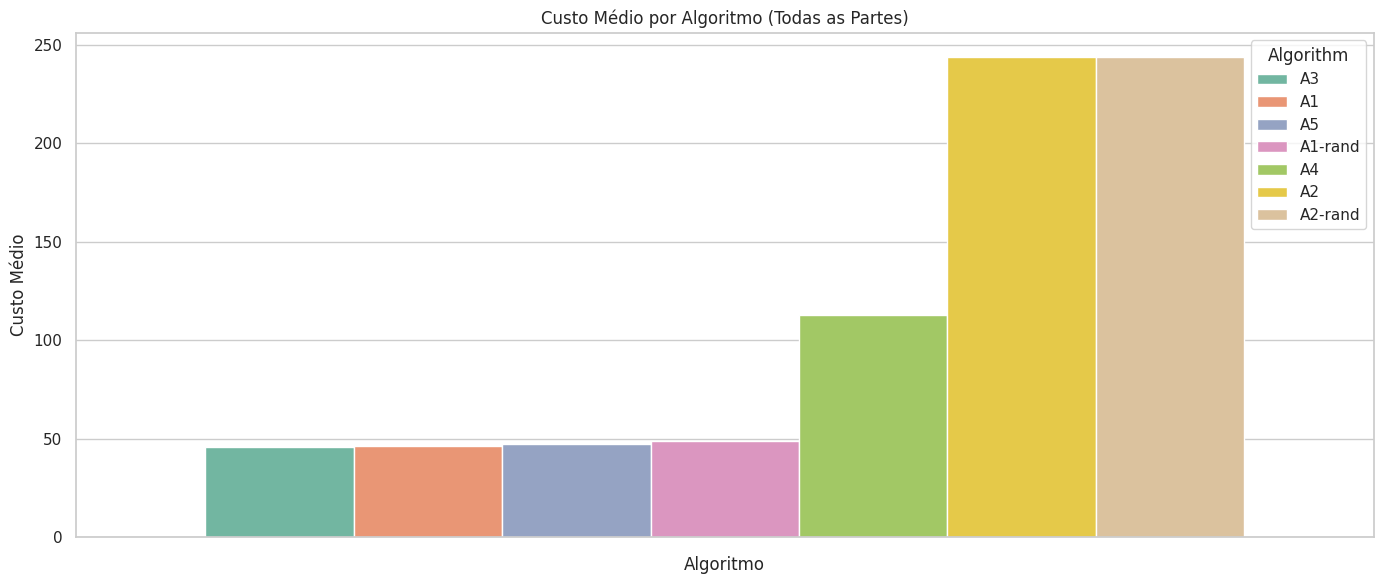

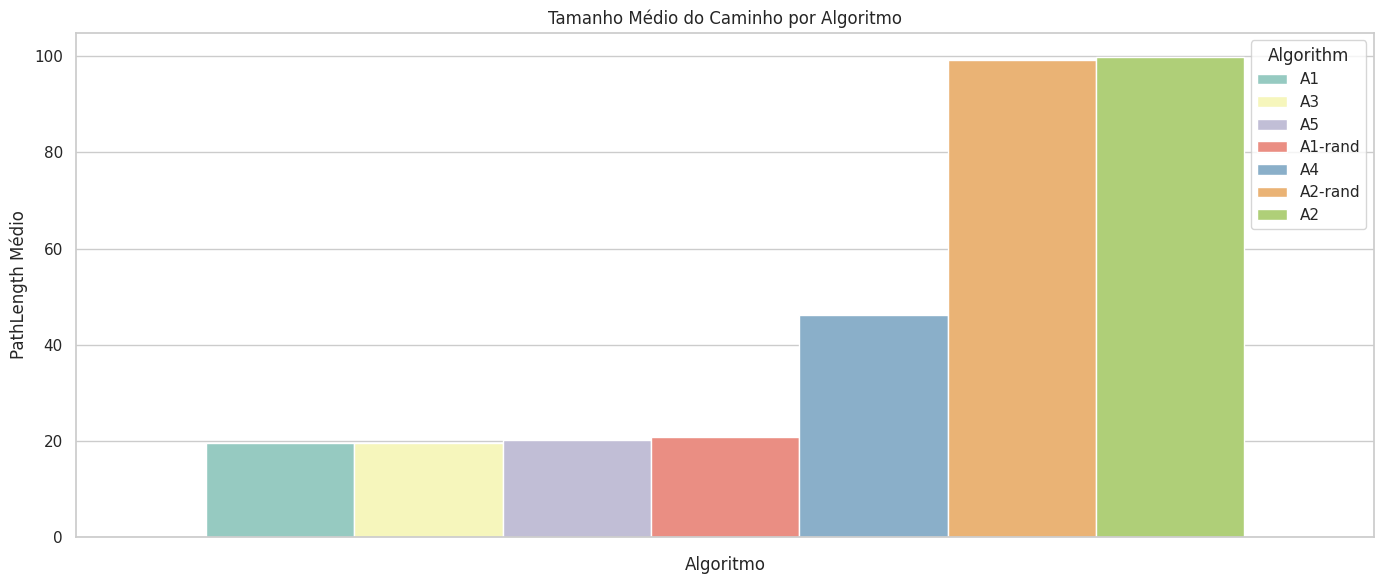

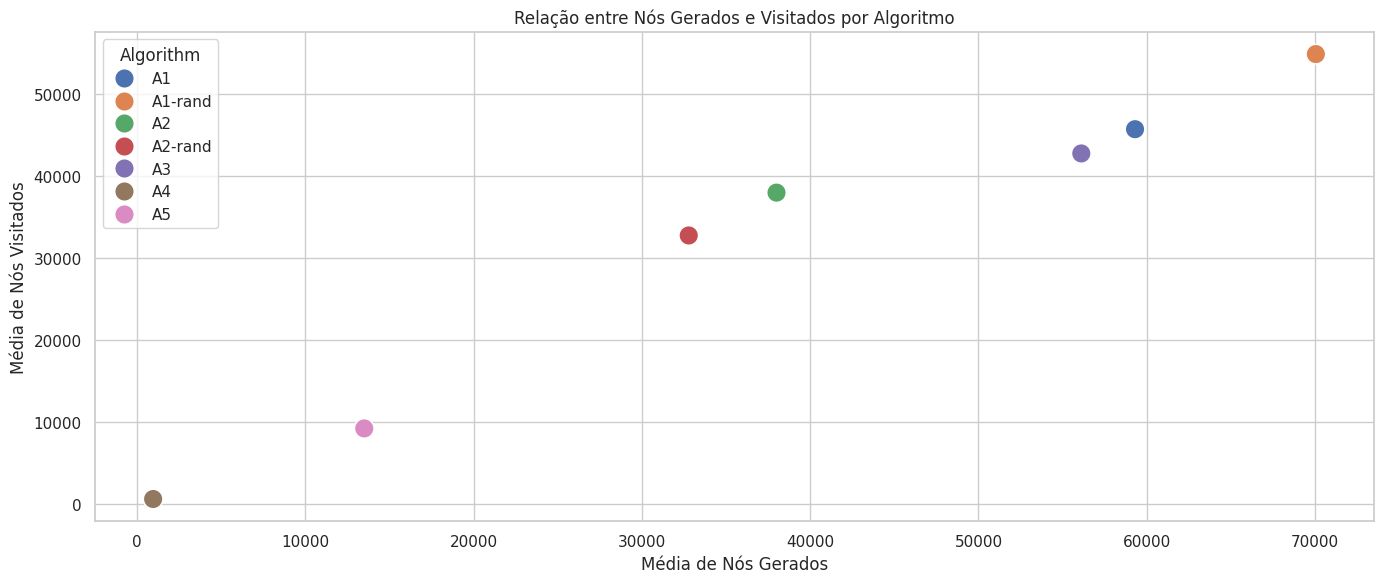

In [48]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

# Gráfico 1: Custo médio por algoritmo em todas as partes
plt.figure()
df_group = df_all.groupby('Algorithm')['Cost'].mean().reset_index().sort_values(by='Cost')
sns.barplot(data=df_group, hue='Algorithm', y='Cost', palette='Set2')
plt.title('Custo Médio por Algoritmo (Todas as Partes)')
plt.ylabel('Custo Médio')
plt.xlabel('Algoritmo')
plt.tight_layout()
plt.show()

# Gráfico 2: Comparação de PathLength médio por algoritmo
plt.figure()
df_group2 = df_all.groupby('Algorithm')['PathLength'].mean().reset_index().sort_values(by='PathLength')
sns.barplot(data=df_group2, hue='Algorithm', y='PathLength', palette='Set3')
plt.title('Tamanho Médio do Caminho por Algoritmo')
plt.ylabel('PathLength Médio')
plt.xlabel('Algoritmo')
plt.tight_layout()
plt.show()

# Gráfico 3: Nós Gerados vs. Nós Visitados (eficiência de expansão)
plt.figure()
df_group3 = df_all.groupby('Algorithm')[['NodesGenerated', 'NodesVisited']].mean().reset_index()
sns.scatterplot(data=df_group3, x='NodesGenerated', y='NodesVisited', hue='Algorithm', s=200)
plt.title('Relação entre Nós Gerados e Visitados por Algoritmo')
plt.xlabel('Média de Nós Gerados')
plt.ylabel('Média de Nós Visitados')
plt.tight_layout()
plt.show()


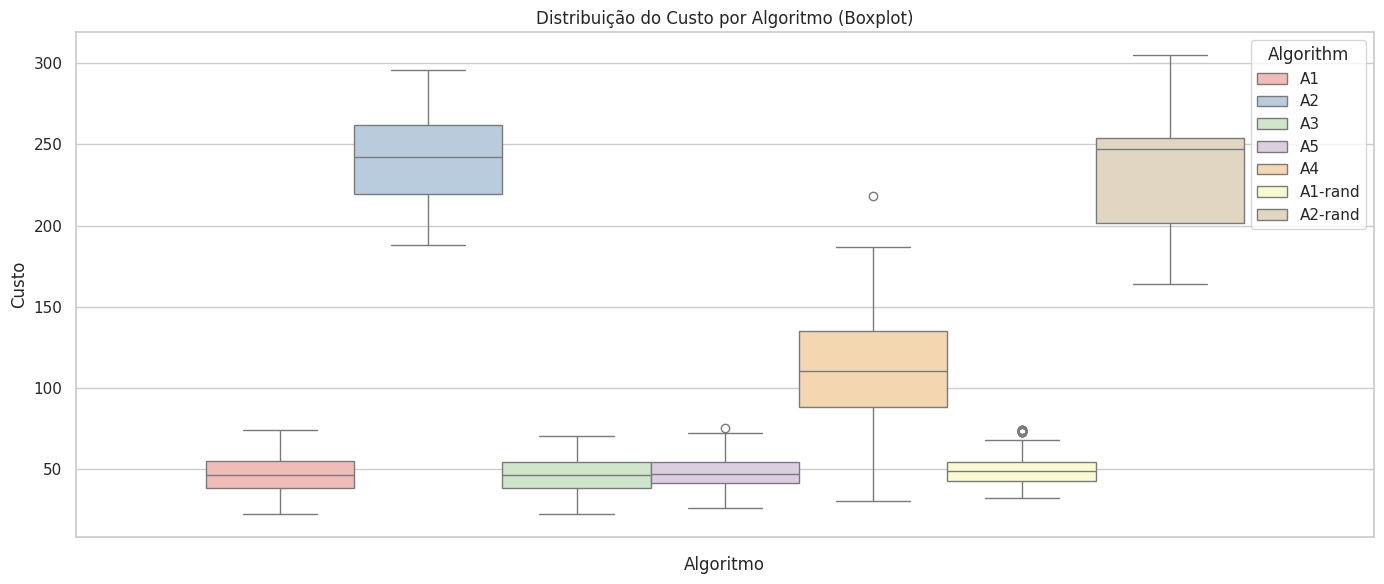

In [47]:
plt.figure()
sns.boxplot(data=df_all, hue='Algorithm', y='Cost', palette='Pastel1')
plt.title('Distribuição do Custo por Algoritmo (Boxplot)')
plt.ylabel('Custo')
plt.xlabel('Algoritmo')
plt.tight_layout()
plt.show()

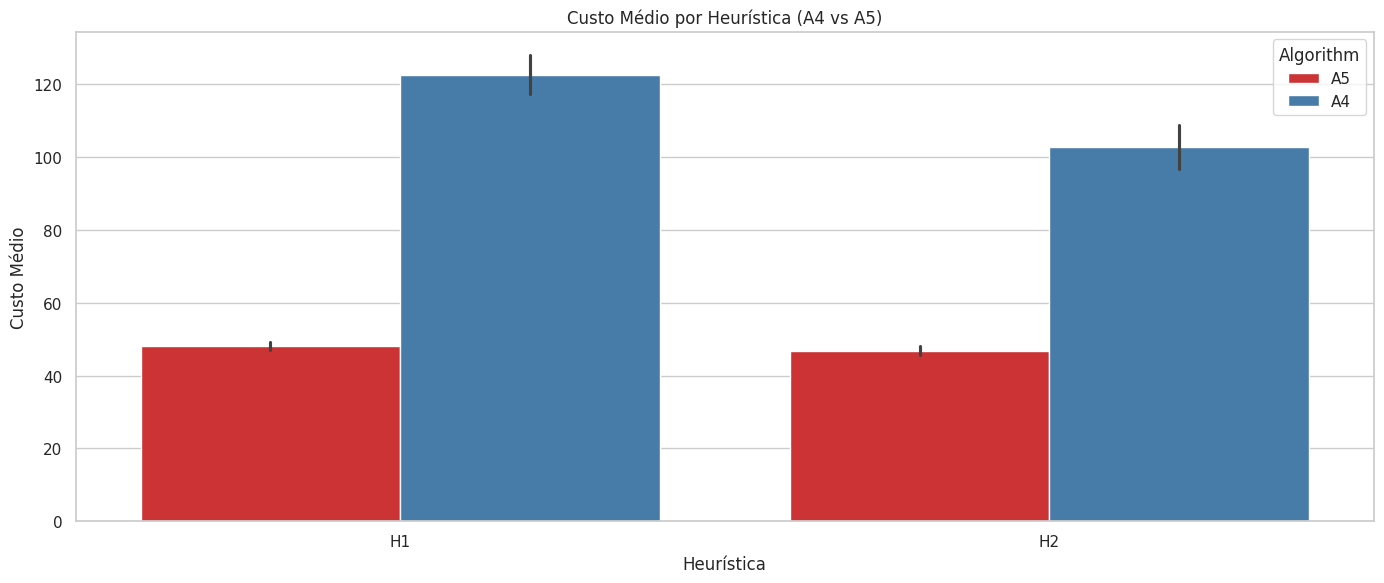

In [49]:
df_heuristics = df_all[df_all['Algorithm'].isin(['A4', 'A5'])]
plt.figure()
sns.barplot(data=df_heuristics, x='Heuristic', y='Cost', hue='Algorithm', palette='Set1')
plt.title('Custo Médio por Heurística (A4 vs A5)')
plt.ylabel('Custo Médio')
plt.xlabel('Heurística')
plt.tight_layout()
plt.show()

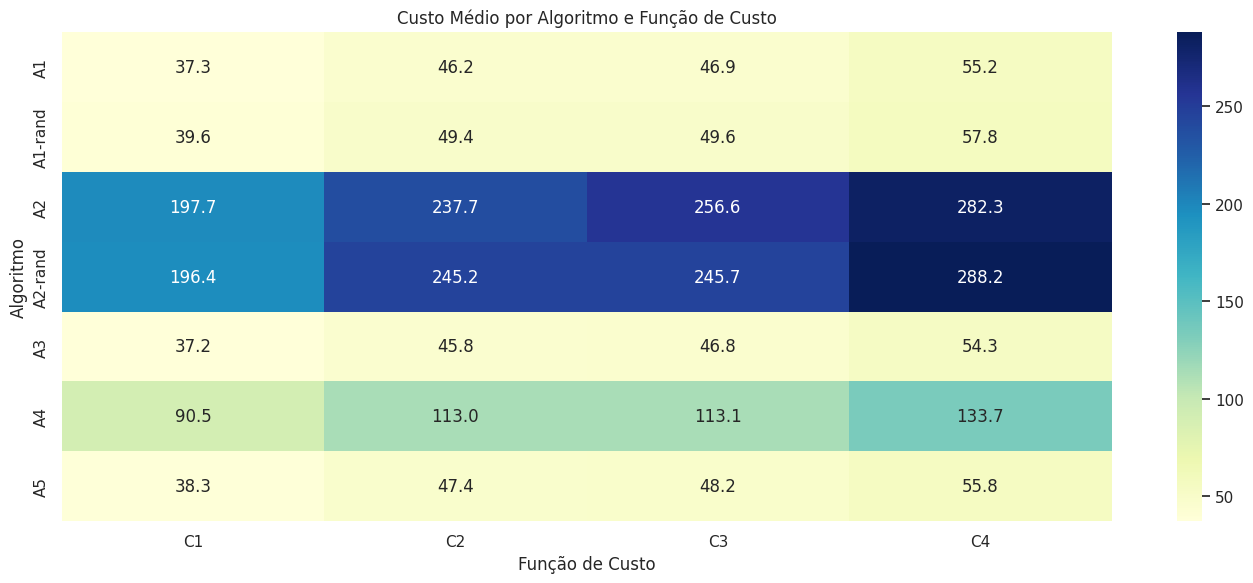

In [50]:
pivot_cost = df_all.pivot_table(index='Algorithm', columns='CostFunction', values='Cost', aggfunc='mean')
plt.figure()
sns.heatmap(pivot_cost, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Custo Médio por Algoritmo e Função de Custo')
plt.ylabel('Algoritmo')
plt.xlabel('Função de Custo')
plt.tight_layout()
plt.show()